In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("traffic.csv")
print(df)

           event        date       country         city  \
0          click  2021-08-21  Saudi Arabia       Jeddah   
1          click  2021-08-21  Saudi Arabia       Jeddah   
2          click  2021-08-21         India     Ludhiana   
3          click  2021-08-21        France      Unknown   
4          click  2021-08-21      Maldives         Malé   
...          ...         ...           ...          ...   
226273  pageview  2021-08-24        Kuwait  Kuwait City   
226274  pageview  2021-08-24         India      Chennai   
226275  pageview  2021-08-24         India       Jaipur   
226276  pageview  2021-08-24        France      Unknown   
226277  pageview  2021-08-24          Iraq        Duhok   

                                   artist                             album  \
0                                  Tesher                       Jalebi Baby   
1                                  Tesher                       Jalebi Baby   
2                           Reyanna Maria             

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [4]:
df.isnull()
df.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [5]:
df.duplicated()

0         False
1          True
2         False
3         False
4         False
          ...  
226273     True
226274    False
226275     True
226276     True
226277     True
Length: 226278, dtype: bool

In [6]:
df.duplicated().sum()

103711

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

event      0
date       0
country    0
city       0
artist     0
album      0
track      0
isrc       0
linkid     0
dtype: int64

In [11]:
df.head(20)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
5,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02
6,click,2021-08-21,Sierra Leone,Unknown,Coi Leray,No More Parties,No More Parties,USUM72100947,51a9a818-40d2-432d-b48a-9dcff61c6278
7,click,2021-08-21,United Kingdom,Stockport,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,4a44b83e-9563-4891-af3f-36fa37421db6
8,click,2021-08-21,United States,Pflugerville,Billie Eilish,Happier Than Ever,Happier Than Ever,USUM72105936,d58a7ad8-f1f7-43c7-90fc-02906b703089
9,click,2021-08-21,France,Unknown,"DMNDS, Strange Fruits Music, Fallen Roses, Luj...",Calabria (feat. Lujavo & Nito-Onna),Calabria (feat. Lujavo & Nito-Onna),GBSMU9833211,681d888a-59ce-4acb-b7c5-95dab0c063d9
10,click,2021-08-20,Sweden,Stockholm,Vitamin A,Happy Birthday,Happy Birthday,US3DF1612162,f563adc4-d7c6-4d70-93d0-06bab552f642


In [12]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day

df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
5,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02


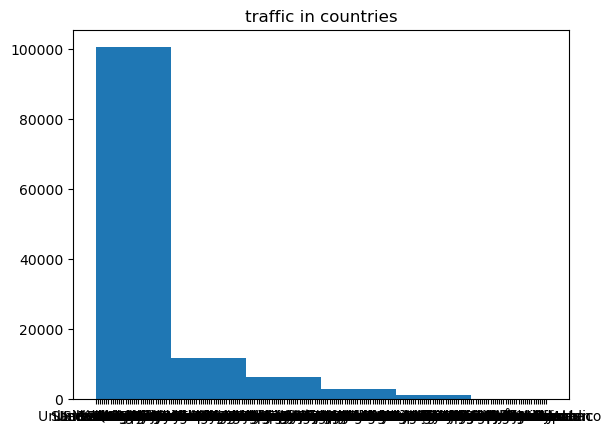

In [13]:
plt.hist(df['country'],bins=6)
plt.title("traffic in countries")
plt.show()

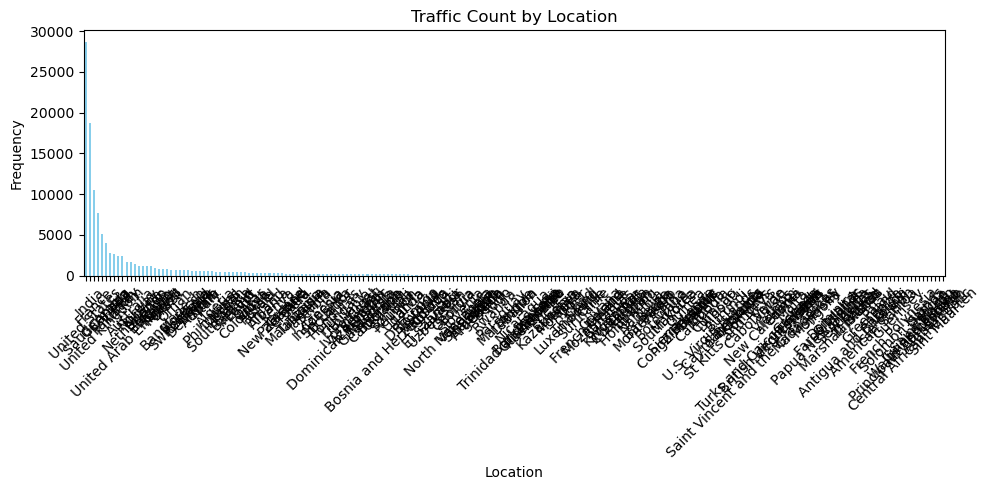

In [25]:

plt.figure(figsize=(10, 5))
df['country'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Traffic Count by Location")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()